## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [5]:
data = pd.read_csv("RegData.csv")
print(data.head(5))

   2.900000095    4
0          6.7  7.4
1          4.9  5.0
2          7.9  7.2
3          9.8  7.9
4          6.9  6.1


Text(0.5, 1.0, 'Plot the original data')

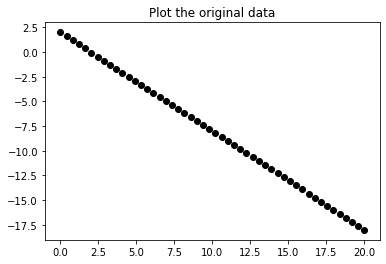

In [70]:
X = np.linspace(0,20).reshape((50,1))
# X =np.c_[np.ones(len(X),dtype='int64'),X]
y = -1 * X + 2

plt.scatter(X, y, color='black')
plt.gca().set_title("Plot the original data")

# X =np.c_[np.ones(len(X),dtype='int64'),X]

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [41]:
# Stochastic_GD
def stochastic_GD_LinearRegression(X, y, t0_current=0, t1_current=0, epochs=100, learning_rate=0.0001):
    cost_history = [0] * epochs
    th0 = [0] * epochs
    th1 = [0] * epochs
    for j in range(epochs):
        y_new=[]
        for i in range(len(y)):
            
            y_current = t0_current + (t1_current * X[i])
            cost = ((y_current - y[i])**2)/2
            t0_gradient = (y_current - y[i])
            t1_gradient = X[i]*(y_current - y[i])
            t0_current = t0_current - (learning_rate * t0_gradient)
            t1_current = t1_current - (learning_rate * t1_gradient)
            y_new.append(y_current)
            cost_history[i] = cost
            th0[i] = t0_current
            th1[i] = t1_current
        
    print("accuracy: " ,r2_score(y,y_new) * 100 ,"%")
        
    return [t0_current, t1_current, cost_history, th0, th1]
        

#### Try your function with any input parameterss of your choice.

In [71]:
clf_2 = stochastic_GD_LinearRegression(X, y)
# print("cost: " , clf_2[2])

accuracy:  97.53445326598651 %


Text(0.5, 1.0, 'Stochastic GD LinearRegression')

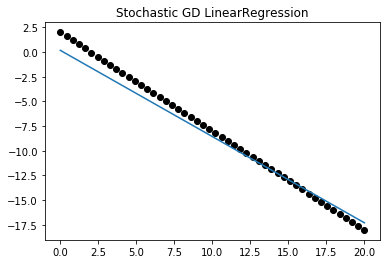

In [72]:
plt.scatter(X, y, color='black')
plt.plot(X, clf_2[0] + clf_2[1] * X) # y = theta0 + theta1*x
plt.gca().set_title("Stochastic GD LinearRegression")

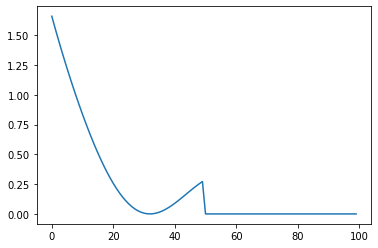

In [73]:
plt.plot(clf_2[2])
plt.show()

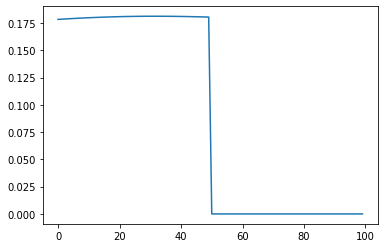

In [74]:
plt.plot(clf_2[3])
plt.show()

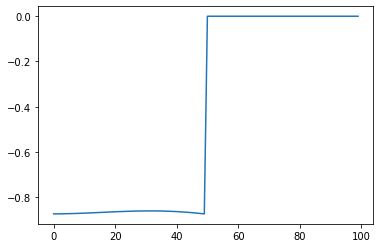

In [75]:
plt.plot(clf_2[4])
plt.show()

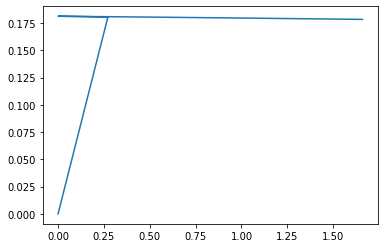

In [76]:
plt.plot(clf_2[2],clf_2[3])
plt.show()

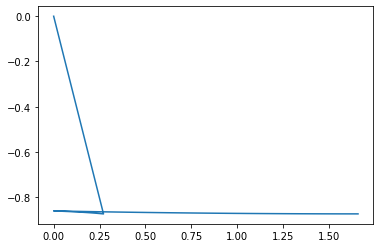

In [77]:
plt.plot(clf_2[2],clf_2[4])
plt.show()

In [96]:
len(y)

50

In [99]:
# mini_batch_GD
def mini_batch_GD_LinearRegression(X, y, t0_current=0, t1_current=0, epochs=1000, learning_rate=0.00001):
    cost_history = [0] * epochs
    th0 = [0] * epochs
    th1 = [0] * epochs 
    for j in range(epochs):
        for i in range(10): #we iterate the data to 10 chunks 
            n = i*5
            m = n+5
            y_current = t0_current + (t1_current * X)
            cost = np.sum((y[n:m]-y_current[n:m])**2) / 2*len(y[n:m])
            t0_gradient = np.sum(y_current[n:m] - y[n:m]) / len(y[n:m])
            t1_gradient = np.sum(X[n:m]*(y_current[n:m] - y[n:m])) / len(y[n:m]) 
            t0_current = t0_current - (learning_rate * t0_gradient)
            t1_current = t1_current - (learning_rate * t1_gradient)
            cost_history[i] = cost
            th0[i] = t0_current
            th1[i] = t1_current
            
    print("accuracy: " ,r2_score(y,y_current) * 100 ,"%")
        
    return [t0_current, t1_current, cost_history, th0, th1]

accuracy:  96.99794573165563 %


Text(0.5, 1.0, 'Mini batch GD LinearRegression')

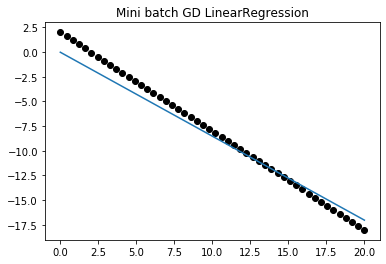

In [100]:
clf_3 = mini_batch_GD_LinearRegression(X, y)

plt.scatter(X, y, color='black')
plt.plot(X, clf_3[0] + clf_3[1] * X) # y = theta0 + theta1*x
plt.gca().set_title("Mini batch GD LinearRegression")

Text(0.5, 1.0, 'loss')

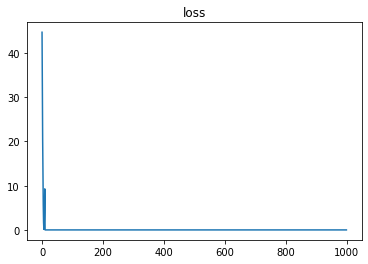

In [101]:
plt.plot(clf_3[2])
plt.gca().set_title("loss")

Text(0.5, 1.0, 'theta_0')

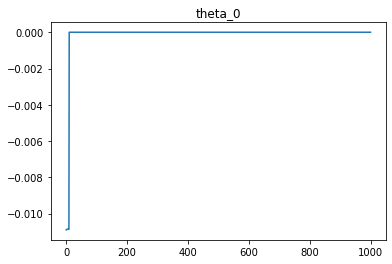

In [105]:

plt.plot(clf_3[3])
plt.gca().set_title("theta_0")

Text(0.5, 1.0, 'theta_1')

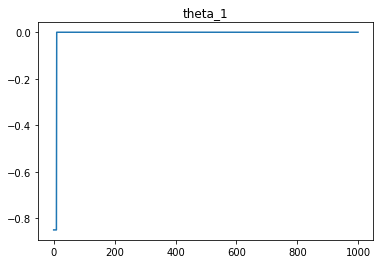

In [106]:
plt.plot(clf_3[4])
plt.gca().set_title("theta_1")

Text(0.5, 1.0, 'loss with theta_0')

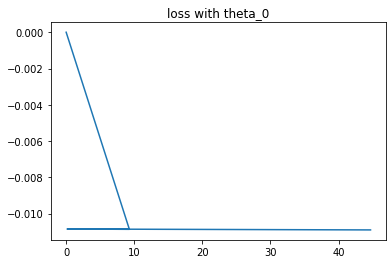

In [107]:
plt.plot(clf_3[2],clf_3[3])
plt.gca().set_title("loss with theta_0")

Text(0.5, 1.0, 'loss with theta_1')

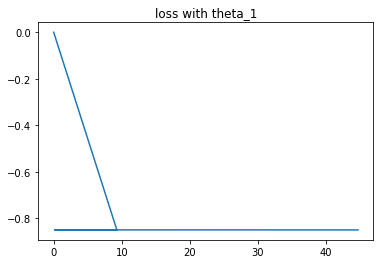

In [108]:
plt.plot(clf_3[2],clf_3[4])
plt.gca().set_title("loss with theta_1")

#### Calculate r2 score

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

#### Plot all regression lines till converge

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD